In [1]:
import sagemaker

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = 'sagemaker/DEMO-pytorch-dcgan'

role = sagemaker.get_execution_role()

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-903447430181


In [2]:
import os
import subprocess

instance_type = 'local'

if subprocess.call('nvidia-smi') == 0:
    ## Set type to GPU if one is present
    instance_type = 'local_gpu'
    
print("Instance type = " + instance_type)

Instance type = local_gpu


In [3]:
from utils import *

In [4]:
image_size = 64
batch_size = 128
workers = 6

transform = transforms.Compose([transforms.Scale(image_size),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

train_loader = torch.utils.data.DataLoader(
             datasets.ImageFolder('../../data',
                transform=transform),
                batch_size=batch_size, shuffle=True,
              num_workers=workers, pin_memory=True)

/home/ec2-user/SageMaker/envs/danulab1/lib/python3.6/site-packages/torchvision/transforms/transforms.py:200: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


# Data preview

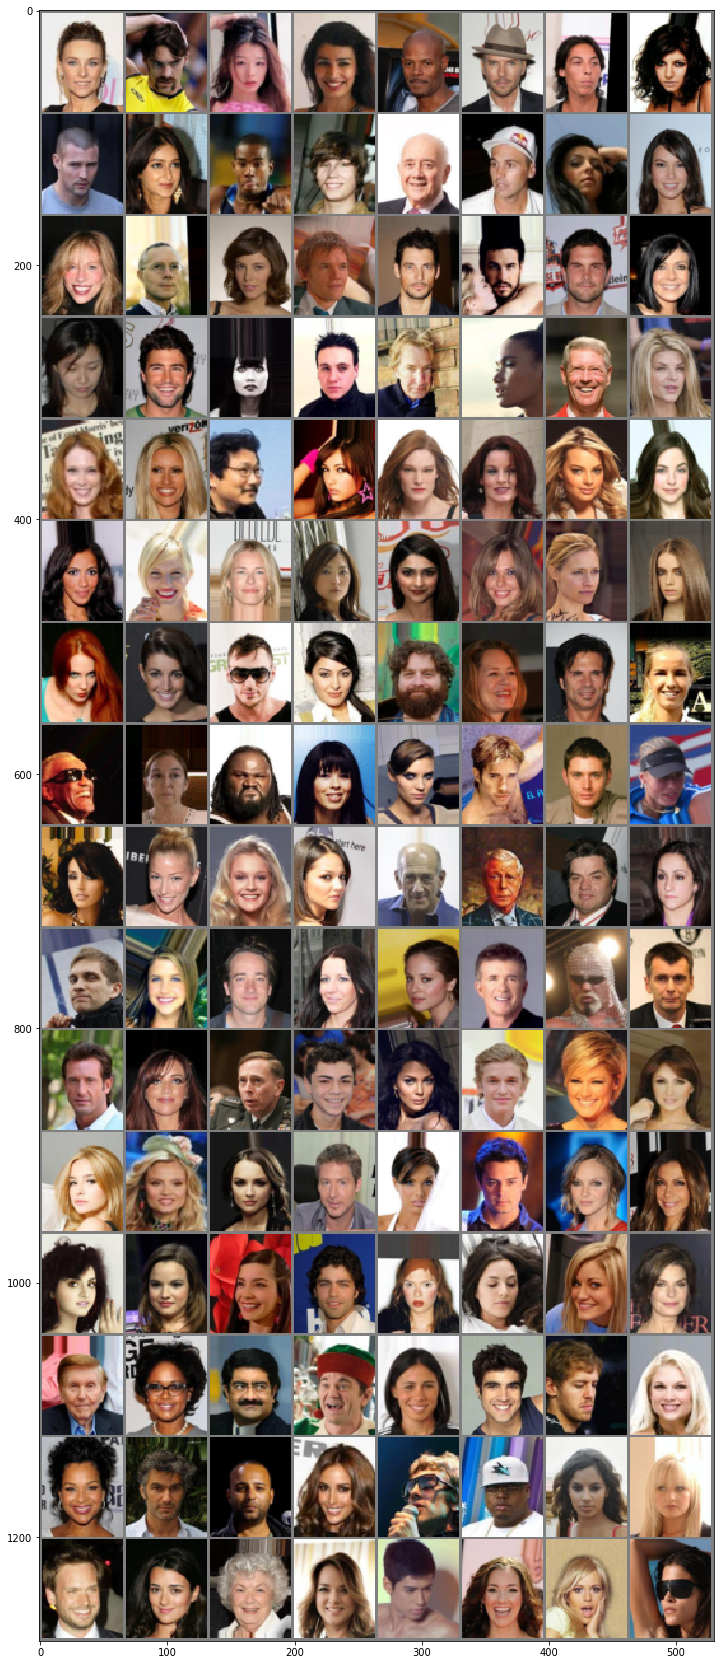

In [5]:

import numpy as np
import torchvision, torch

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(40, 30)


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [6]:
# test_inputs = 's3://aws-ai/test-data/celebA'

inputs = "s3://sagemaker-us-east-1-903447430181/data/celebA/"

# Training

In [10]:
from sagemaker.pytorch import PyTorch

dcgan_estimator = PyTorch(entry_point='main-dcgan.py',
                          source_dir='../src/',
                          role=role,
                          framework_version='1.0.0.dev',
                          train_instance_count=2,
                          train_instance_type='ml.p3.8xlarge',
                          hyperparameters={'epochs': 30},
                          base_job_name='DCGAN')

In [ ]:
dcgan_estimator.fit(inputs)

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-903447430181
INFO:sagemaker:Creating training-job with name: DCGAN-2018-11-27-12-08-29-934


2018-11-27 12:08:30 Starting - Starting the training job...
2018-11-27 12:08:31 Starting - Launching requested ML instances.........
2018-11-27 12:10:12 Starting - Preparing the instances for training...